<a href="https://colab.research.google.com/github/JuliMillan/Diversidad_rol/blob/main/Diversidad_rol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importamos paquetes

In [65]:
!pip install squarify
!pip install plotly==5.1.0 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import string
import matplotlib.patches as mpatches
from scipy import stats
import folium
import scipy.stats as ss
import squarify
#plt.rcParams.update({'font.size':14})
#from google.colab import files
import plotly.express as px
import plotly.graph_objects as go

###Correr si no tenés montado GDrive

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Funciones útiles

In [67]:
def normalidad(datos, alfa):
  # Ingresar los datos como un array de numpy
  k2, p = stats.normaltest(edades, nan_policy='omit')
  print("p = {:g}".format(p))
  if p < alpha:  # Hipótesis nula: la distribución proviene de una distribución Guassiana
    print("La distribución no es normal")
  else:
    print("La distribución parece normal")

def pie_plot(datos, explode, titulo, color=sns.color_palette('Set2')):
  #datos: serie de pandas; 
  #explode: array de valores con la cantidad de variables 
  d = datos.value_counts()
  pie, ax = plt.subplots(figsize=[10,6])
  labels=d.keys()
  plt.pie(x=d, autopct='%.1f%%', 
          explode=explode, labels=labels, 
          pctdistance=0.5, startangle=90,
          colors = color)
  ax.axis('equal')
  plt.title('{}'.format(titulo), fontsize=14, pad=30.0)
  plt.tight_layout()
  return plt.show()

def heat_map(columna_1, columna_2):
  matriz = pd.crosstab(index=columna_1, columns=columna_2)
  fig = sns.heatmap(matriz)
  return matriz, fig

def tree_plot(datos, columna, titulo):
  #datos: dataframe df['columna']
  #columna: 'columna'
  d = pd.DataFrame(datos.value_counts().reset_index())
  d.columns = [columna, 'conteo']
  color=sns.color_palette("inferno")
  fig, ax = plt.subplots(figsize=(10, 6))
  squarify.plot(sizes=d['conteo'], label=d[columna], alpha=.7, color=color)
  plt.axis('off')
  plt.title('{}'.format(titulo), fontsize=14)
  return plt.show()

def violin_plot(columna1, columna2, paleta, titulo, xlabel, ylabel):
  #columna1 y 2: df.columna
  f, ax = plt.subplots(figsize=(10, 7))
  sns.violinplot(x=columna1, y=columna2, palette=paleta, inner='stick')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  plt.title('{}'.format(titulo), fontsize=14)
  plt.xlabel('{}'.format(xlabel))
  plt.ylabel('{}'.format(ylabel))
  return plt.show()

def barplot(columna1, columna2, d):
  #Gráfico de barra con la cantidad de valores
  fig, ax = plt.subplots(figsize=(10,6))
  sns.barplot(x=columna1, y=columna2, data=d)
  for p in ax.patches:
    _x = p.get_x() + p.get_width() + .4
    _y = p.get_y() + p.get_height()
    value = int(p.get_width())
    ax.text(_x, _y, value, ha="left", va='bottom')
  plt.xticks([])
  plt.xlabel('')
  plt.ylabel('')
  return plt.show()

def count_plot_vertical(columna1, columna2, df,paleta, xlabel='', ylabel='Cantidad', tamano=(6,6)):
  #columna1: df['columna1']
  #columna2: "columna"
  orden=columna1.value_counts().index
  total=columna1.count()
  fig, ax = plt.subplots(figsize=tamano)
  sns.countplot(x=columna2, data=df, palette=paleta, order=orden)
  #Para mostrar los valores sobre las barras verticales
  for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = "{:.1f}%".format((int(p.get_height())*100)/total)
    ax.text(_x, _y, value, ha="center") 
  plt.xlabel('{}'.format(xlabel))
  plt.ylabel('{}'.format(ylabel))
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  return plt.show()

def cramers_v(x, y):
  #Correlacióón entre variables categóricas
  confusion_matrix = pd.crosstab(x,y)
  chi2 = ss.chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2 = chi2/n
  r,k = confusion_matrix.shape
  phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
  rcorr = r-((r-1)**2)/(n-1)
  kcorr = k-((k-1)**2)/(n-1)
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def matriz_corr(df_corr, dataframe):
  #df_corr: dataframe con los valores de correlación
  #dataframe: original
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111)
  cax = ax.matshow(df_corr,cmap='viridis', vmin=-1, vmax=1)
  fig.colorbar(cax)
  ticks = np.arange(0,len(dataframe.columns),1)
  ax.set_xticks(ticks)
  plt.xticks(rotation=90)
  ax.set_yticks(ticks)
  ax.set_xticklabels(dataframe.columns)
  ax.set_yticklabels(dataframe.columns)
  return plt.show()

##Exploramos los datos

In [68]:
archivo = "/content/drive/MyDrive/Copia de Diversidad sexual y de género en el mundo de los juegos de rol (respuestas) - Respuestas de formulario 1.csv"
df = pd.read_csv(archivo)
df.head(3)

,Marca temporal,Qué edad tenés?,Qué juego/s jugás?,Participás como,Con qué género te identificás?,"En relación al género que se te asignó al nacer, te considerás",Cuál es tu orientación sexual?,Alguna vez sufriste discriminación (como jugadorx) por tu género u orientación sexual durante una partida?,Presenciaste algún tipo de discriminación hacia otra persona?,"En caso de haber sufrido/presenciado casos de discriminación, reaccionaste de alguna manera?",Tus grupos de juego normalmente están conformados por,En qué país naciste?,En qué país vivís?,"Algo que quieras agregar, contar, comentar, criticar?"
0,16/06/2021 22:13:54,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina,NaN
1,17/06/2021 10:11:50,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina,NaN
2,17/06/2021 10:25:49,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina,NaN


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 14 columns):
 #   Column                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                       --------------  -----  
 0   Marca temporal                                                                                               159 non-null    object 
 1   Qué edad tenés?                                                                                              149 non-null    float64
 2   Qué juego/s jugás?                                                                                           158 non-null    object 
 3   Participás como                                                                                              158 non-null    object 
 4   Con qué género te identificás?                                

In [70]:
df.columns = [
              'fecha', 'edad', 'juegos', 'rol', 'genero', 'identidad', 'sexualidad', 
              'discriminacion_personal', 'discriminacion_otre', 'reaccion',
              'grupo', 'nacimiento', 'residencia', 'comentario'
              ]

df.head(3)

,fecha,edad,juegos,rol,genero,identidad,sexualidad,discriminacion_personal,discriminacion_otre,reaccion,grupo,nacimiento,residencia,comentario
0,16/06/2021 22:13:54,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina,NaN
1,17/06/2021 10:11:50,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina,NaN
2,17/06/2021 10:25:49,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina,NaN


In [71]:
df1 = df.iloc[:,1:13]
df1.head(3)

,edad,juegos,rol,genero,identidad,sexualidad,discriminacion_personal,discriminacion_otre,reaccion,grupo,nacimiento,residencia
0,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina
1,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
2,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina


##Edades y género

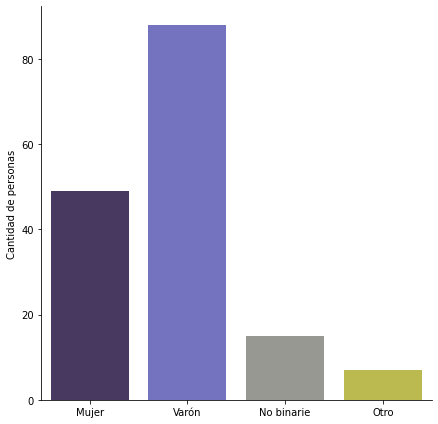

In [72]:
figure = sns.catplot(x="genero", kind="count", palette="gist_stern", 
                     data=df1, order=['Mujer', 'Varón', 'No binarie','Otro'], height=6)
plt.xlabel('')
plt.ylabel('Cantidad de personas')
#plt.savefig("1.jpg",bbox_inches='tight')
#files.download("1.jpg") 
plt.show()

In [73]:
edades = (df1['edad'])
#print(edades)
#print(edades.shape)
#print(type(edades))
print(edades.describe())
edades_np = edades.dropna()
edades_np = edades_np.to_numpy()
#print(type(edades_np))
print(edades_np.mean())


count    149.000000
mean      30.221477
std        6.740204
min       16.000000
25%       26.000000
50%       30.000000
75%       35.000000
max       51.000000
Name: edad, dtype: float64
30.221476510067113


In [74]:
mediana = (edades.median())
print('La edad más representada es {} años, con {} personas.'.format(int(mediana), np.sum([df1['edad']==mediana])))

La edad más representada es 30 años, con 16 personas.


In [75]:
edad_maxima = int(edades.max())
edad_minima = int(edades.min())
print('Edad máxima: ', edad_maxima ,'\nEdad mínima: ', edad_minima)

Edad máxima:  51 
Edad mínima:  16


In [76]:
alpha = 1e-3
normalidad(edades_np, alpha)

p = 0.132478
La distribución parece normal


In [77]:
edades_genero = df1[['edad', 'genero']]
#edades_genero.head(3)

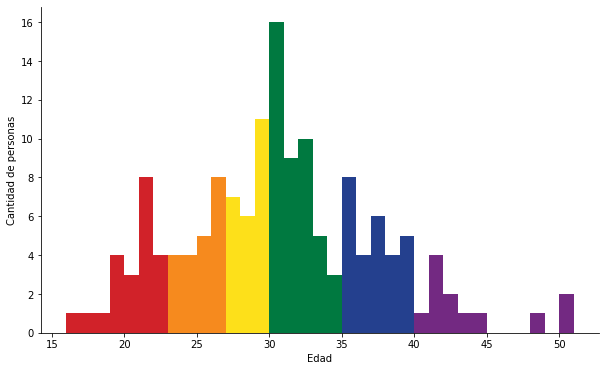

In [78]:
fig, ax = plt.subplots(figsize=(10,6))
bin=(edad_maxima-edad_minima)

N, bins, patches = ax.hist(edades, bins=bin)

for i in range(0,7):
    patches[i].set_facecolor('#D12229')
for i in range(7,11):    
    patches[i].set_facecolor('#F68A1E')
for i in range(11,16):
    patches[i].set_facecolor('#FDE01A')
for i in range(14,19):
    patches[i].set_facecolor('#007940')
for i in range(19,24):    
    patches[i].set_facecolor('#24408E')
for i in range(24, len(patches)):
    patches[i].set_facecolor('#732982')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Edad')
plt.ylabel('Cantidad de personas')
plt.show()

In [79]:
edades_m = edades_genero[edades_genero['genero']=='Mujer'].dropna()
edades_v = edades_genero[edades_genero['genero']=='Varón'].dropna()
edades_nb = edades_genero[edades_genero['genero']=='No binarie'].dropna()
edades_o = edades_genero[edades_genero['genero']=='Otro'].dropna()

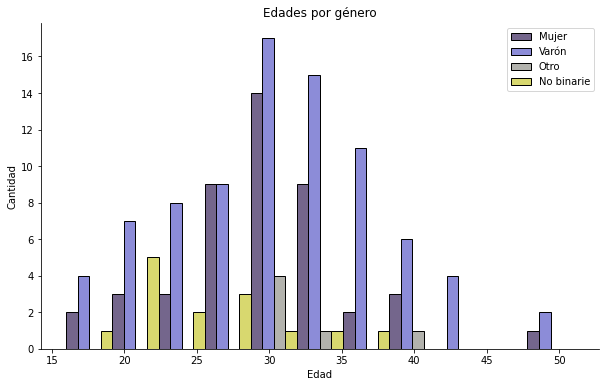

In [80]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.histplot(data=edades_genero, x="edad", hue="genero", 
                      multiple="dodge", palette='gist_stern')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Edades por género')
fig.get_legend().set_title(None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



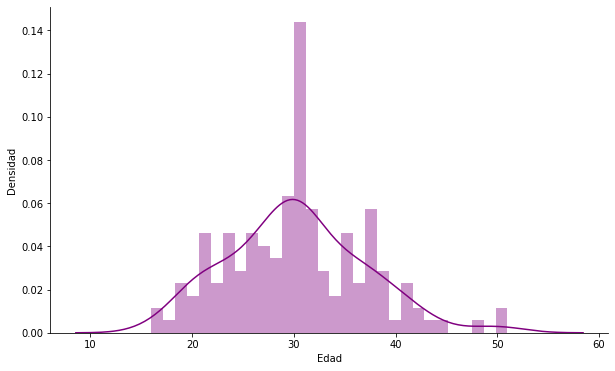

In [81]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.distplot(edades_genero['edad'], bins=30, color='purple')
plt.xlabel('Edad')
plt.ylabel('Densidad')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

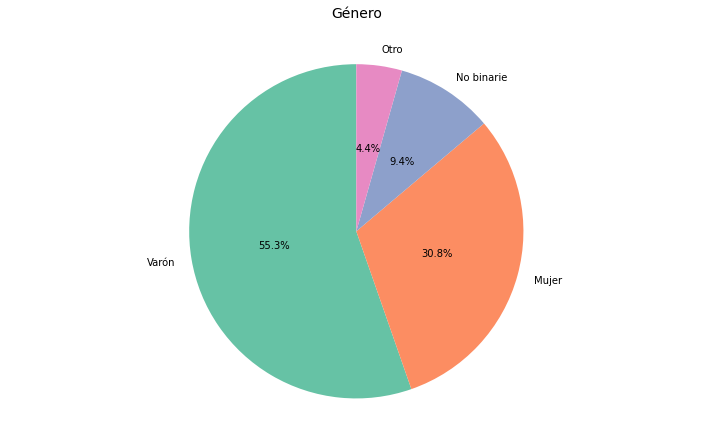

In [82]:
pie_plot(df1['genero'], np.zeros(4), 'Género')

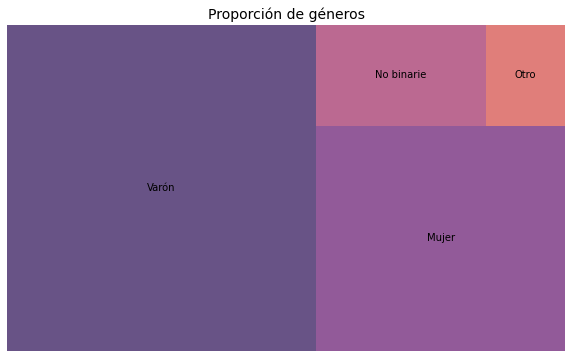

In [83]:
tree_plot(df1['genero'], 'genero', 'Proporción de géneros')

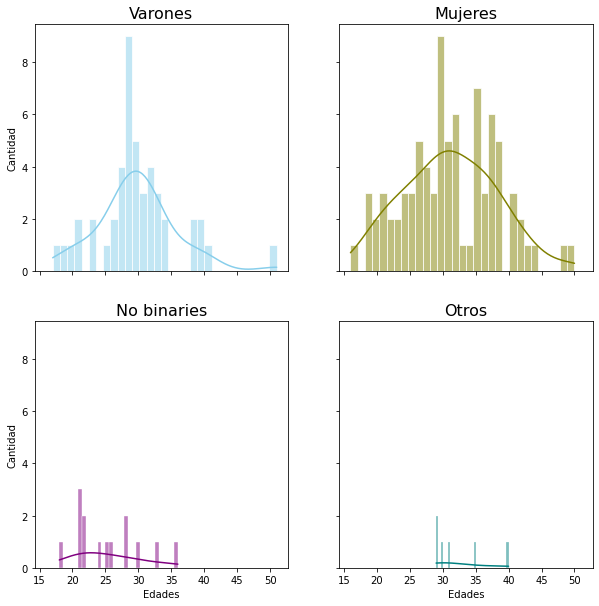

In [84]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
bins=31

with sns.axes_style("darkgrid"):
  sns.histplot(edades_m, x="edad", kde=True, color="skyblue", ax=axs[0, 0], bins=bins).set_title('Varones', size=16)
  sns.histplot(edades_v, x="edad", kde=True, color="olive", ax=axs[0, 1], bins=bins).set_title('Mujeres', size=16)
  sns.histplot(edades_nb, x="edad", kde=True, color="purple", ax=axs[1, 0], bins=bins).set_title('No binaries', size=16)
  sns.histplot(edades_o, x="edad", kde=True, color="teal", ax=axs[1, 1],bins=bins).set_title('Otros', size=16)

  plt.setp(axs[-1, :], xlabel='Edades')
  plt.setp(axs[:, 0], ylabel='Cantidad')
  plt.show()

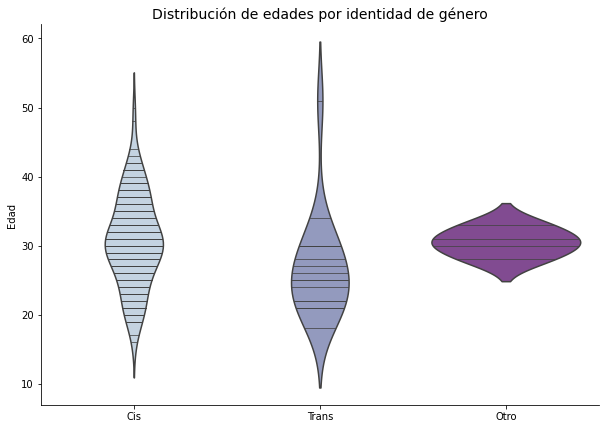

In [85]:
#Violin plot usando la función definida previamente
violin_plot(df1.identidad, df1.edad, "BuPu",'Distribución de edades por identidad de género','','Edad')

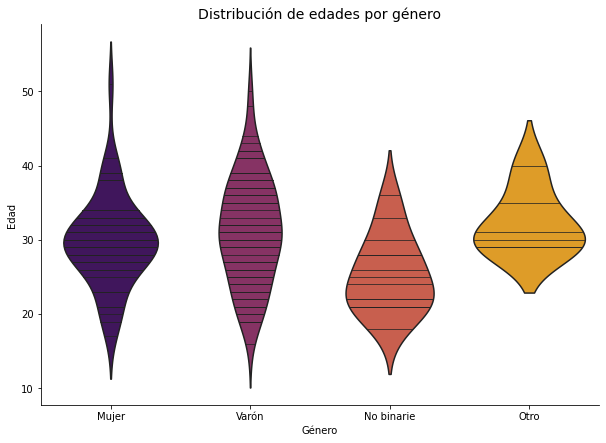

In [86]:
#Violin plot cambiando el orden de los datos
f, ax = plt.subplots(figsize=(10, 7))
sns.violinplot(x=df1.genero, y=df1.edad, palette="inferno", inner='stick', order=['Mujer', 'Varón', 'No binarie','Otro'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Distribución de edades por género', fontsize=14)
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()

##Juegos

In [87]:
juegos1 = df['juegos'].dropna()
#Armo la lista con todos los juegos nombrados por separado
juegos = [j.split(';') for j in juegos1]
flat_list = [item for sublist in juegos for item in sublist]
juegos_ = [i.split(', ') for i in flat_list]
jj = [item for sublist in juegos_ for item in sublist]
print(len(jj))

391


In [88]:
#Cuento la cantidad de veces que aparece un juego
contador = Counter(jj)
#Uso los juegos que más aparecen para armar un dataframe
mas_comunes = contador.most_common(11)
juegos_mas_comunes = pd.DataFrame(mas_comunes)
juegos_mas_comunes
print(mas_comunes)

[('Dungeons & Dragons 5E', 98), ('La Llamada de Cthulhu', 42), ('Vampiros', 38), ('Pathfinder', 38), ('Dungeons & Dragons 3.5', 35), ('Hombre Lobo', 9), ('GURPS', 9), ('PbtA', 8), ('Homebrew', 5), ('Warhammer', 5), ('Indies', 5)]


In [89]:
#Armo un dataframe con los juegos más comunes y la cantidad de veces que aparecen
datos = pd.DataFrame(mas_comunes)
datos.columns=['juego', 'cantidad']
datos

,juego,cantidad
0,Dungeons & Dragons 5E,98
1,La Llamada de Cthulhu,42
2,Vampiros,38
3,Pathfinder,38
4,Dungeons & Dragons 3.5,35
5,Hombre Lobo,9
6,GURPS,9
7,PbtA,8
8,Homebrew,5
9,Warhammer,5


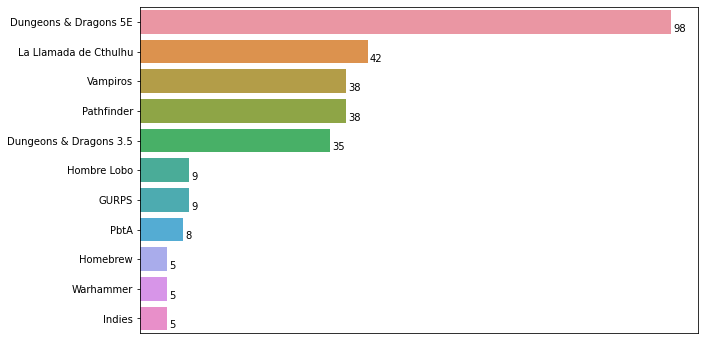

In [90]:
barplot('cantidad','juego', datos)

In [91]:
#Agrego al dataframe una columna con los porcentajes
total = len(jj)
datos['porcentaje'] = ((datos['cantidad']*100)/total)
datos

,juego,cantidad,porcentaje
0,Dungeons & Dragons 5E,98,25.063939
1,La Llamada de Cthulhu,42,10.741688
2,Vampiros,38,9.718670
3,Pathfinder,38,9.718670
4,Dungeons & Dragons 3.5,35,8.951407
5,Hombre Lobo,9,2.301790
6,GURPS,9,2.301790
7,PbtA,8,2.046036
8,Homebrew,5,1.278772
9,Warhammer,5,1.278772


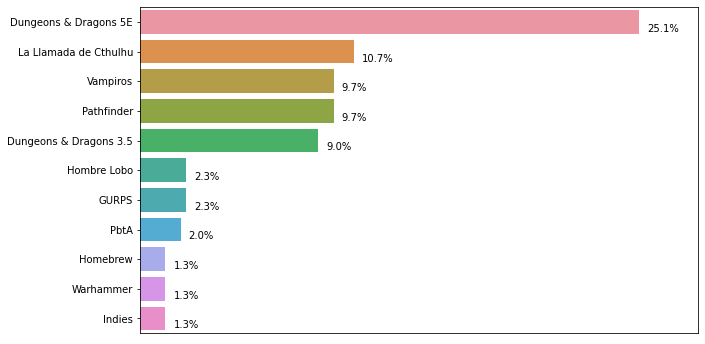

In [92]:
#Gráfico de barras con porcentaje
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='porcentaje', y='juego', data=datos)
#Para mostrar los valores a la derecha de las barras horizontales, en formato porcentaje
for p in ax.patches:
  _x = p.get_x() + p.get_width() + .4
  _y = p.get_y() + p.get_height()
  value = "{:.1f}%".format(p.get_width())
  ax.text(_x, _y, value, ha="left", va='bottom')
plt.xticks([])
plt.xlim([0,28]) #alargo un poco el eje para que no toque el número
plt.xlabel('')
plt.ylabel('')
plt.show()

##Identidad de género

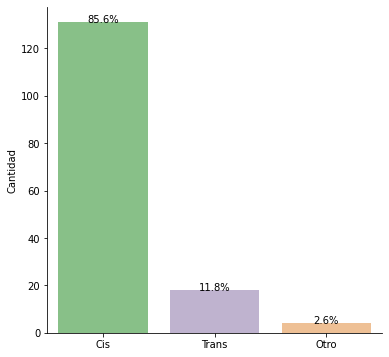

In [93]:
count_plot_vertical(df1['identidad'],'identidad',df1,'Accent')

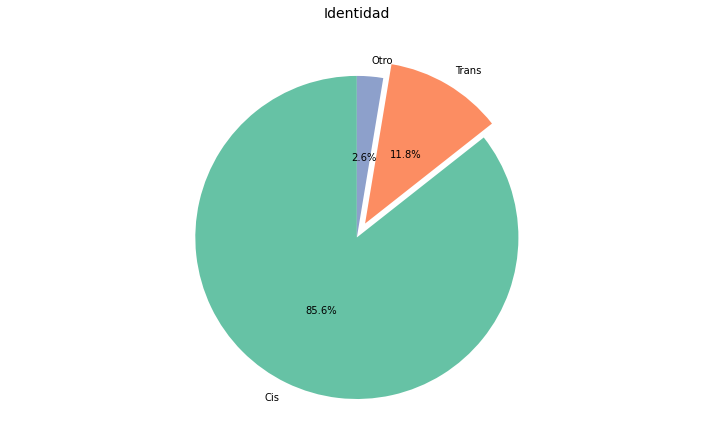

In [94]:
pie_plot(df1['identidad'],[0,.1,0], 'Identidad')

##Sexualidad

In [95]:
df1['sexualidad'].value_counts()

Heterosexual    82
Bisexual        44
Homosexual      12
Pansexual        7
Asexual          7
Otro             7
Name: sexualidad, dtype: int64

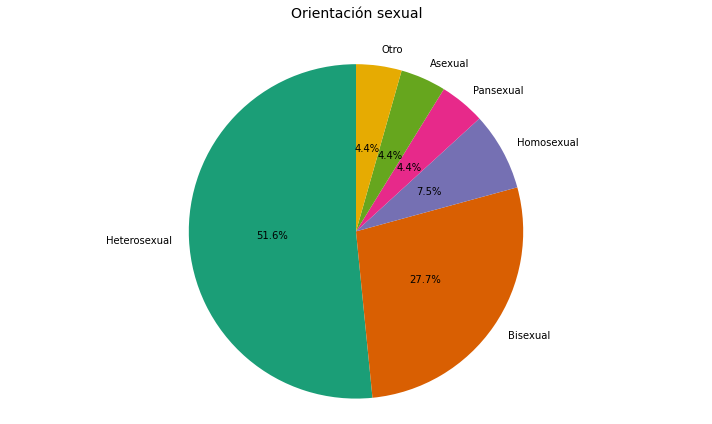

In [96]:
pie_plot(df1['sexualidad'], np.zeros(6), 'Orientación sexual', sns.color_palette("Dark2"))

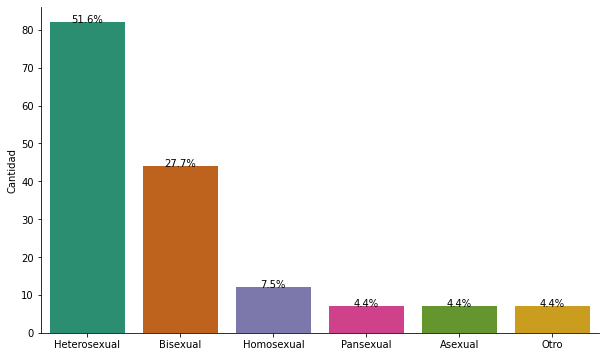

In [97]:
count_plot_vertical(df1['sexualidad'], 'sexualidad', df1, 'Dark2',tamano=(10,6))

##Discriminación

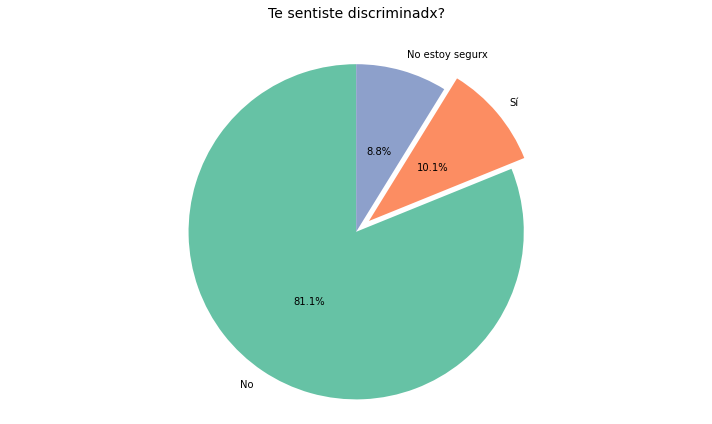

In [98]:
pie_plot(df1['discriminacion_personal'], [0,.1,0], 'Te sentiste discriminadx?')

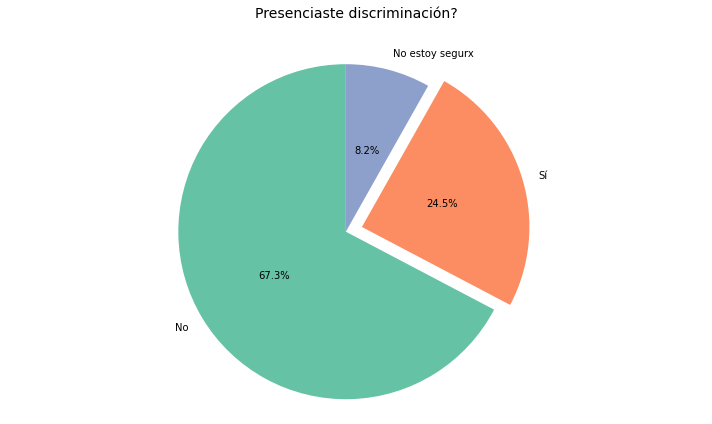

In [99]:
pie_plot(df1['discriminacion_otre'], [0,.1,0], 'Presenciaste discriminación?')

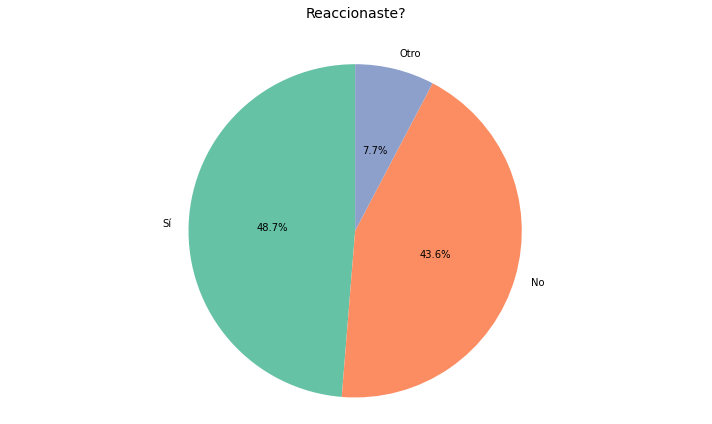

In [100]:
pie_plot(df1['reaccion'], np.zeros(3), 'Reaccionaste?')

##Grupos

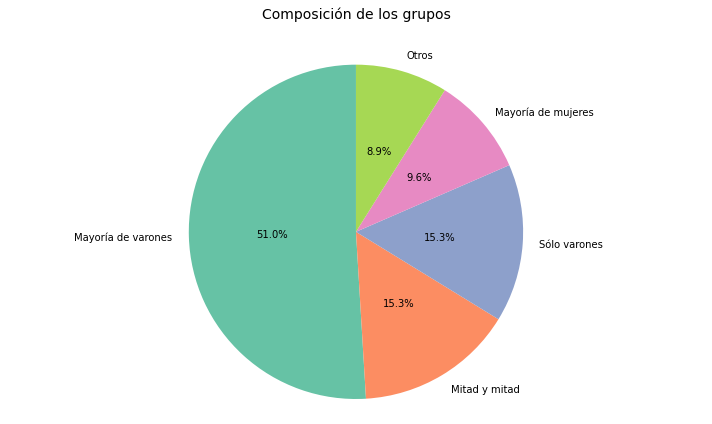

In [101]:
pie_plot(df1['grupo'], np.zeros(5), 'Composición de los grupos')

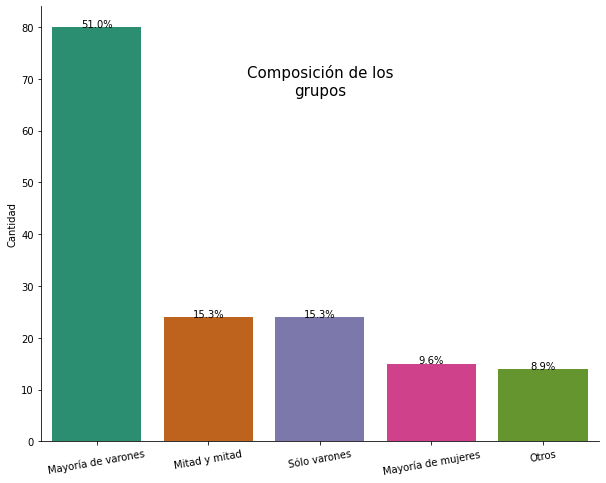

In [102]:
total=df1['grupo'].count()
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x="grupo", data=df1, palette='Dark2', order=df1['grupo'].value_counts().index)
for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height()
  value = '{:.1f}%'.format(int(p.get_height()*100)/total)
  ax.text(_x, _y, value, ha="center") 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('')
plt.xticks(rotation=10, ha='center') #Rotar las etiquetas del eje x para que no se superpongan
plt.ylabel('Cantidad')
#Personalizar la localización del título
ax.set_title('Composición de los\ngrupos', fontsize=15, loc='center', y=0.9,  pad= -45)
plt.show()

##Correlaciones

###Pearson's

In [103]:
#Correlación pearson entre todas las variables
corr = df1.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr

,edad,juegos,rol,genero,identidad,sexualidad,discriminacion_personal,discriminacion_otre,reaccion,grupo,nacimiento,residencia
edad,1.000000,0.179321,0.004513,0.065775,0.086477,0.090136,0.076821,0.039153,0.043069,-0.089203,0.048461,0.140910
juegos,0.179321,1.000000,0.100257,0.238287,0.141250,0.111420,0.052564,0.086455,0.125780,0.205207,-0.041517,0.044649
rol,0.004513,0.100257,1.000000,0.206018,0.009112,0.052859,-0.075225,0.187947,-0.065442,-0.105525,-0.071935,-0.003751
genero,0.065775,0.238287,0.206018,1.000000,0.464497,0.231405,0.121747,-0.000509,0.043590,0.183357,0.006195,0.152430
identidad,0.086477,0.141250,0.009112,0.464497,1.000000,0.409208,0.052161,0.040882,0.034247,0.127838,0.067520,0.166717
sexualidad,0.090136,0.111420,0.052859,0.231405,0.409208,1.000000,0.041624,0.068226,0.066999,0.207431,0.116955,0.038797
discriminacion_personal,0.076821,0.052564,-0.075225,0.121747,0.052161,0.041624,1.000000,0.149952,0.022958,0.072578,-0.021171,-0.020788
discriminacion_otre,0.039153,0.086455,0.187947,-0.000509,0.040882,0.068226,0.149952,1.000000,0.160692,0.227009,-0.190751,-0.103851
reaccion,0.043069,0.125780,-0.065442,0.043590,0.034247,0.066999,0.022958,0.160692,1.000000,-0.022068,0.015087,0.049140
grupo,-0.089203,0.205207,-0.105525,0.183357,0.127838,0.207431,0.072578,0.227009,-0.022068,1.000000,-0.043996,0.089314


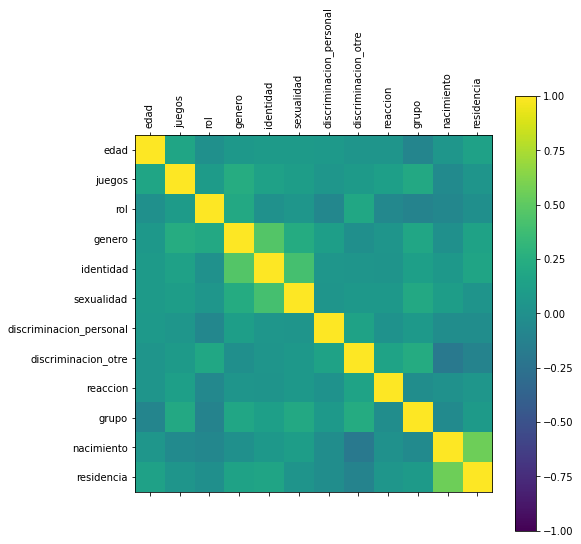

In [104]:
matriz_corr(corr,df1)

###Cramer's

In [105]:
rows= []
for var1 in df1:
  col = []
  for var2 in df1:
    cramers =cramers_v(df1[var1], df1[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
cr = pd.DataFrame(cramers_results, columns = df1.columns, index =df1.columns)
cr

,edad,juegos,rol,genero,identidad,sexualidad,discriminacion_personal,discriminacion_otre,reaccion,grupo,nacimiento,residencia
edad,1.00,0.18,0.22,0.20,0.00,0.25,0.09,0.21,0.25,0.20,0.30,0.35
juegos,0.18,1.00,0.30,0.40,0.44,0.17,0.40,0.22,0.25,0.32,0.34,0.30
rol,0.22,0.30,1.00,0.23,0.00,0.08,0.00,0.16,0.00,0.06,0.16,0.12
genero,0.20,0.40,0.23,1.00,0.54,0.40,0.25,0.05,0.00,0.25,0.00,0.05
identidad,0.00,0.44,0.00,0.54,1.00,0.31,0.15,0.00,0.00,0.27,0.19,0.24
sexualidad,0.25,0.17,0.08,0.40,0.31,1.00,0.18,0.00,0.00,0.11,0.13,0.06
discriminacion_personal,0.09,0.40,0.00,0.25,0.15,0.18,1.00,0.21,0.02,0.09,0.00,0.00
discriminacion_otre,0.21,0.22,0.16,0.05,0.00,0.00,0.21,1.00,0.42,0.11,0.22,0.28
reaccion,0.25,0.25,0.00,0.00,0.00,0.00,0.02,0.42,1.00,0.00,0.00,0.00
grupo,0.20,0.32,0.06,0.25,0.27,0.11,0.09,0.11,0.00,1.00,0.07,0.15


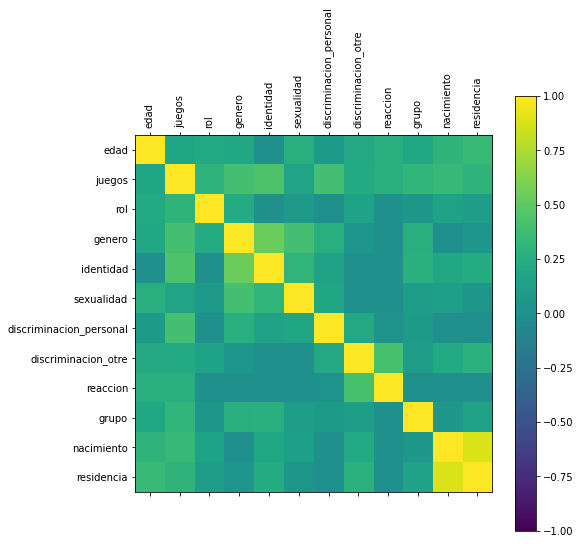

In [106]:
matriz_corr(cr,df1)

In [107]:
gen_disc = cramers_v(df1['genero'], df1['discriminacion_personal'])
print('La relación entre el género y sentirse discriminade es {:.2}'.format(gen_disc))

La relación entre el género y sentirse discriminade es 0.25


In [108]:
cramers_v(df1['identidad'], df1['discriminacion_personal'])

0.15483807526575388

###Crosstab

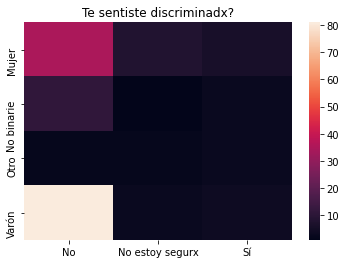

In [109]:
pd.crosstab(index=df1['genero'],columns=df1['discriminacion_personal'])
heat_map(df1['genero'],df1['discriminacion_personal'])
plt.title('Te sentiste discriminadx?')
plt.ylabel('')
plt.xlabel('')
plt.show()

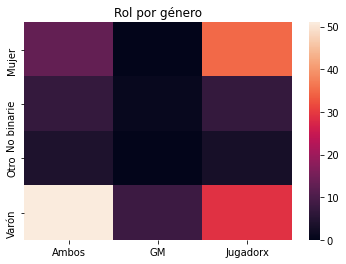

In [110]:
heat_map(df1['genero'], df1['rol'])
plt.title('Rol por género')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [111]:
(pd.crosstab(index=df1['identidad'],columns=df1['grupo'])).sort_values(by=['Mayoría de varones'], ascending=False)

grupo,Mayoría de mujeres,Mayoría de varones,Mitad y mitad,Otros,Sólo varones
identidad,,,,,
Cis,8,67,22,10,22
Trans,7,6,1,4,0
Otro,0,4,0,0,0


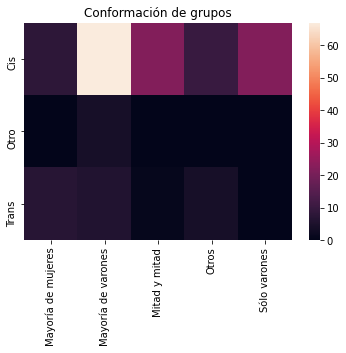

In [112]:
heat_map(df1['identidad'], df1['grupo'])
plt.title('Conformación de grupos')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [113]:
pd.crosstab(index=df1['genero'],columns=df1['grupo'])

grupo,Mayoría de mujeres,Mayoría de varones,Mitad y mitad,Otros,Sólo varones
genero,,,,,
Mujer,7,27,9,4,1
No binarie,4,5,0,5,1
Otro,0,4,1,2,0
Varón,4,44,14,3,22


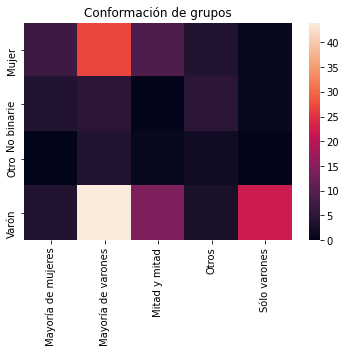

In [114]:
heat_map(df1['genero'], df1['grupo'])
plt.title('Conformación de grupos')
plt.ylabel('')
plt.xlabel('')
plt.show()

##Múltiples variables

###Pandas barras horizontales

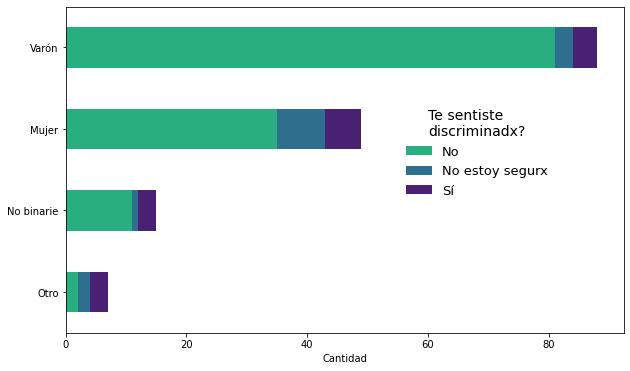

In [115]:
colors = ['#29af7f','#2e6f8e','#482173']
fig = (pd.crosstab(index=df1['genero'],columns=df1['discriminacion_personal'])).sort_values(by=['No']).plot.barh(stacked=True, figsize=(10,6), color=colors)
plt.legend(title='Te sentiste\ndiscriminadx?', title_fontsize=14, loc=(.6,.4), fontsize=13, frameon=False)
plt.xlabel('Cantidad')
plt.ylabel('')
plt.show()

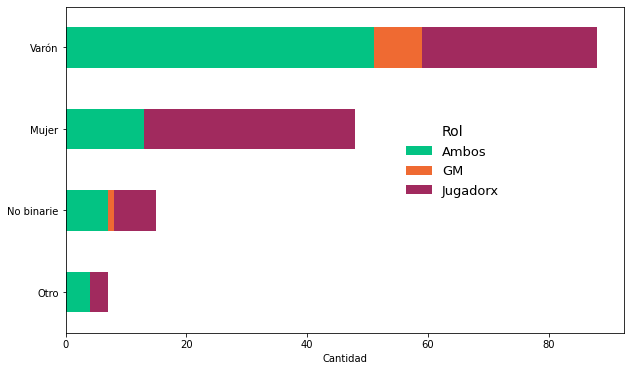

In [116]:
colors = ['#03c383','#ef6a32','#a12a5e']
fig = (pd.crosstab(index=df1['genero'],columns=df1['rol'])).sort_values(by=['Ambos']).plot.barh(stacked=True, figsize=(10,6), color=colors)
plt.legend(title='Rol', title_fontsize=14, loc=(.6,.4), fontsize=13, frameon=False)
plt.xlabel('Cantidad')
plt.ylabel('')
plt.show()

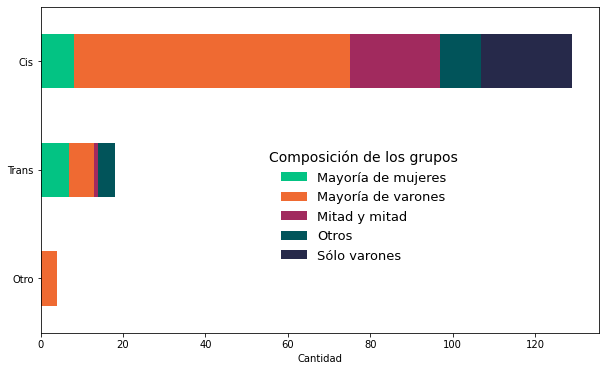

In [117]:
colors = ['#03c383','#ef6a32','#a12a5e', '#01545a', '#26294a']
fig = (pd.crosstab(index=df1['identidad'],columns=df1['grupo'])).sort_values(by=['Mayoría de varones']).plot.barh(stacked=True, figsize=(10,6), color=colors)
plt.legend(title='Composición de los grupos', title_fontsize=14, loc=(.4,.2), fontsize=13, frameon=False)
plt.xlabel('Cantidad')
plt.ylabel('')
plt.show()

###Catplot

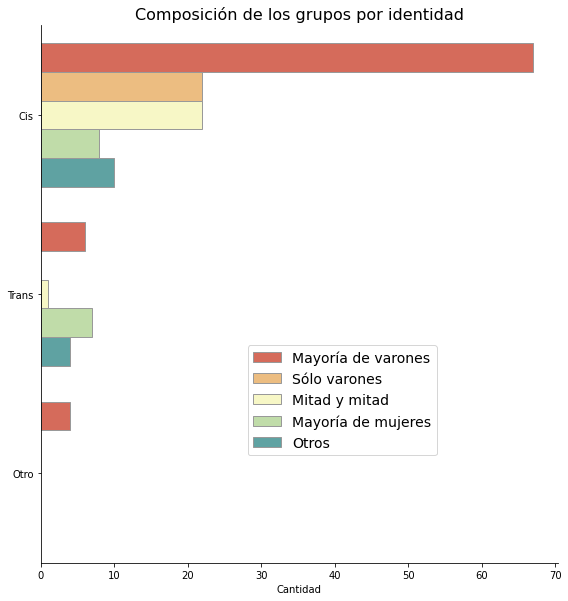

In [118]:
fig = sns.catplot(y="identidad", hue="grupo", kind="count",
            palette="Spectral", edgecolor=".6",
            data=df1, height=8, legend=False, order=['Cis', 'Trans','Otro'])
plt.title('Composición de los grupos por identidad', fontsize=16)
plt.legend(title='', loc=(.4,.2), fontsize=14)
plt.xlabel('Cantidad')
plt.ylabel('')
plt.show()

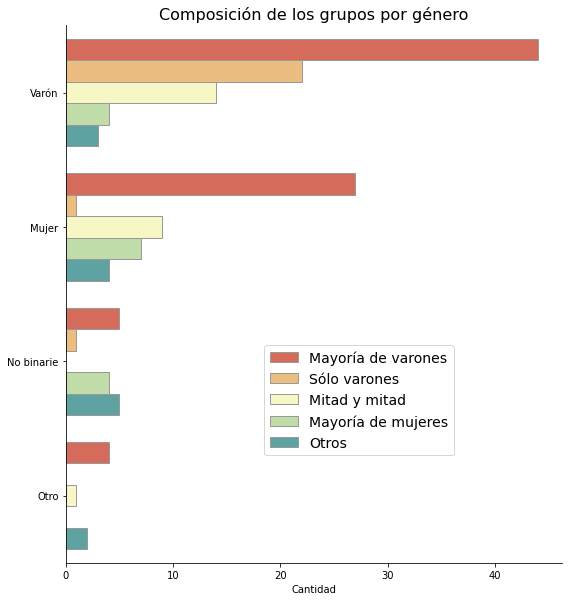

In [119]:
fig = sns.catplot(y="genero", hue="grupo", kind="count",
            palette="Spectral", edgecolor=".6",
            data=df1, height=8, legend=False, order=['Varón', 'Mujer','No binarie','Otro'])
plt.title('Composición de los grupos por género', fontsize=16)
plt.legend(title='', loc=(.4,.2), fontsize=14)
plt.xlabel('Cantidad')
plt.ylabel('')
plt.show()

##Paises

In [120]:
# Hacer un mapa vacío
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

In [121]:
paises_cuenta = (df1['residencia'].value_counts()[:].to_list())

In [122]:
paises = (df1['residencia'].value_counts().index.to_list())
paises

['Argentina',
 'España',
 'Chile',
 'Perú',
 'México',
 'Francia',
 'Panamá',
 'Estados Unidos',
 'Reino Unido']

In [123]:
mapa = pd.DataFrame({'lat':[-34.9,39.6,-10.3,23.8, -26.5, 8.6, 55.1, 39.7, 46.7],
                     'lon': [-65.5, -3.3,-75.4,-102.7, -71.1, -80.0, -2.9, -100.6, 1.8],
                     'paises': paises, 
                     'cant': [116,50,40,40,40,20,20,20,20]})
mapa

,lat,lon,paises,cant
0,-34.9,-65.5,Argentina,116
1,39.6,-3.3,España,50
2,-10.3,-75.4,Chile,40
3,23.8,-102.7,Perú,40
4,-26.5,-71.1,México,40
5,8.6,-80.0,Francia,20
6,55.1,-2.9,Panamá,20
7,39.7,-100.6,Estados Unidos,20
8,46.7,1.8,Reino Unido,20


In [124]:
# add marker one by one on the map
for i in range(0,len(mapa)):
   folium.Circle(
      location=[mapa.iloc[i]['lat'], mapa.iloc[i]['lon']],
      popup=mapa.iloc[i]['paises'],
      radius=float(mapa.iloc[i]['cant']*10000),
      color='#900C3F ',
      fill=True,
      fill_color='#900C3F ').add_to(m)

# Show the map again
m

##Plotly

In [149]:
fig = px.histogram(df1, x="edad", nbins=30, width=800,
                   labels={'edad':'Edades'},
                   color_discrete_sequence=['darkcyan'])
fig.update_layout(
    title={
        'text': "Cantidad de participantes por edad",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_yaxes(title=None)
fig.show()

In [148]:
fig = px.histogram(df1, x="genero", category_orders=dict(genero=['Mujer', 'Varón', 'No binarie', 'Otro']),
                   width=600, color_discrete_sequence=['indianred'])
fig.update_layout(
    title={
        'text': "Cantidad de participantes por género",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_xaxes(title=None)
fig.update_yaxes(title=None)
fig.show()